### Practice 1
- from https://matplotlib.org/stable/tutorials/pyplot.html

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Pyplot tutorial
- An introduction to the pyplot interface. Please also see Quick start guide for an overview of how Matplotlib works and Matplotlib Application Interfaces (APIs) for an explanation of the trade-offs between the supported user APIs.

#### Introduction to pyplot
- matplotlib.pyplot is a collection of functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

- In matplotlib.pyplot various states are preserved across function calls, so that it keeps track of things like the current figure and plotting area, and the plotting functions are directed to the current Axes (please note that we use uppercase Axes to refer to the Axes concept, which is a central part of a figure and not only the plural of axis).

- **Note**: The implicit pyplot API is generally less verbose but also not as flexible as the explicit API. Most of the function calls you see here can also be called as methods from an Axes object. We recommend browsing the tutorials and examples to see how this works. See Matplotlib Application Interfaces (APIs) for an explanation of the trade-off of the supported user APIs.

# plt.subplot => fig, ax

#### Generating visualizations with pyplot

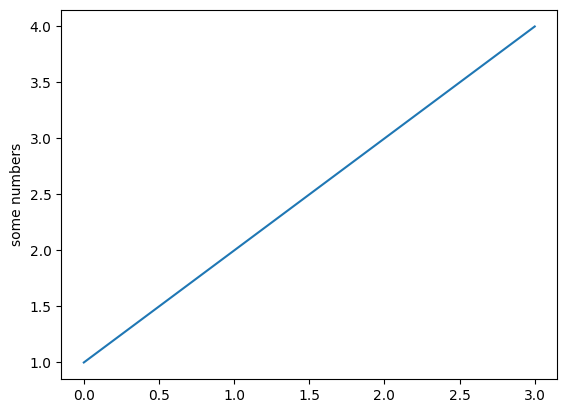

In [2]:
plt.plot([1, 2, 3, 4]) # if only 1 range is given, the plt will assume it is the y-axis and geneate the x-axis
plt.ylabel('some numbers')
plt.show()
# 

- You may be wondering why the x-axis ranges from 0-3 and the y-axis from 1-4. If you provide a single list or array to plot, matplotlib assumes it is a sequence of y values, and automatically generates the x values for you. Since python ranges start with 0, the default x vector has the same length as y but starts with 0; therefore, the x data are [0, 1, 2, 3].

- **plot()** is a versatile function, and will take an arbitrary number of arguments. For example, to plot x versus y, you can write:

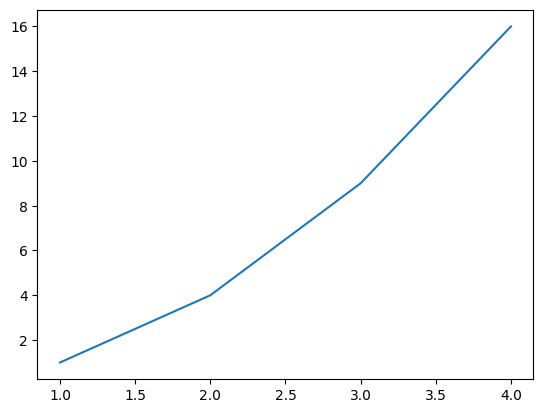

In [3]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
# if 2 inputs are given, then the first is x, the second is y
plt.show()


#### Formatting the style of your plot
- For every x, y pair of arguments, there is an optional third argument which is the format string that indicates the color and line type of the plot. The letters and symbols of the format string are from MATLAB, and you concatenate a color string with a line style string. The default format string is 'b-', which is a solid blue line. For example, to plot the above with red circles, you would issue

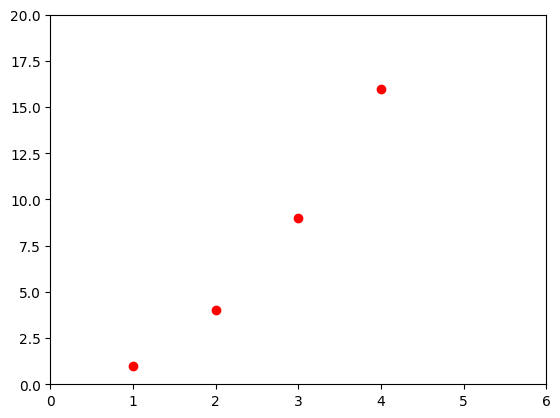

In [4]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro') # 3rd argument are letters and symbols of the format string are from MATLAB
plt.axis((0, 6, 0, 20)) # [xmin, xmax, ymin, ymax]
plt.show()

- See the plot documentation for a complete list of line styles and format strings. The axis function in the example above takes a list of [xmin, xmax, ymin, ymax] and specifies the viewport of the Axes.

- If matplotlib were limited to working with lists, it would be fairly useless for numeric processing. Generally, you will use numpy arrays. In fact, all sequences are converted to numpy arrays internally. The example below illustrates plotting several lines with different format styles in one function call using arrays.

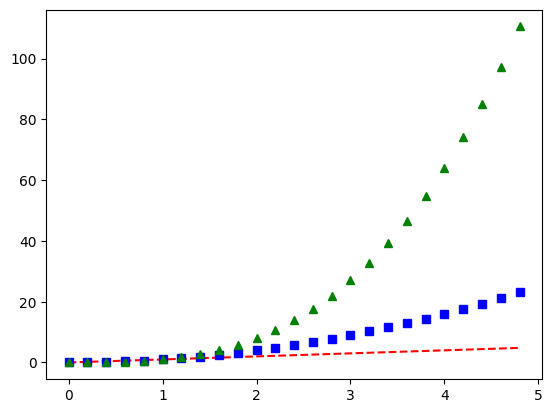

In [5]:
t = np.arange(0., 5., 0.2)
# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^') #  In fact, all sequences are converted to numpy arrays internally
# plot can accept multiple (x, y, marker)
plt.show()

#### plotting with keyword strings
- There are some instances where you have data in a format that lets you access particular variables with strings. For example with structured arrays or pandas.DataFrame
- plt allows you to provide such an object with the data keyword argument. If provided, then you may generate plots with the strings corresponding to these variables.

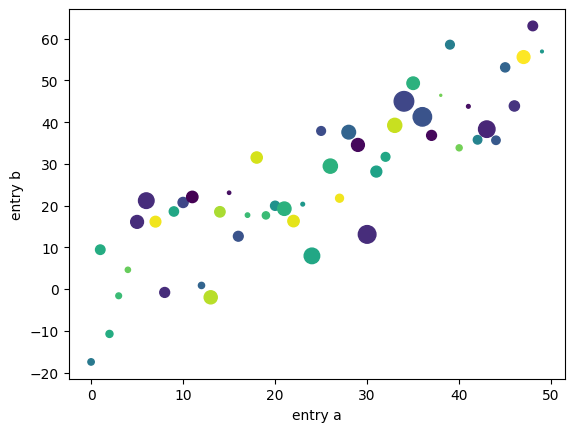

In [6]:
data = {
    'a': np.arange(50),
    'c': np.random.randint(0, 50, 50),
    'd': np.random.randn(50)
    }
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

#### plotting with categorical variables
- It is also possible to create a plot using categorical variables. Matplotlib allows you to pass categorical variables directly to many plotting functions.

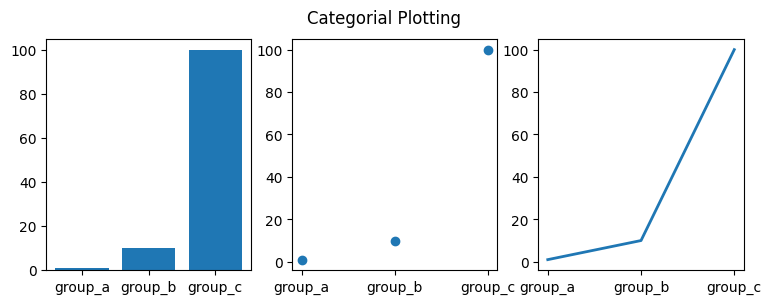

In [7]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131) # 1 column, 3 rows, and 1st graph
plt.bar(names, values)
plt.subplot(132) # 1 column, 3 rows, and 2nd graph
plt.scatter(names, values)
plt.subplot(133) # 1 column, 3 rows, and 3rd graph
plt.plot(names, values, linewidth=2.0)  # setting linewidth
plt.suptitle('Categorial Plotting')
plt.show()

#### Controlling line properties
- Lines have many attributes that you can set: linewidth, dash style, antialiased, etc; see matplotlib.lines.Line2D. There are several ways to set line properties
    - Use keyword arguments:
    ```python
    plt.plot(x, y, linewidth=2.0)
    ```
    - Use the setter methods of a Line2D instance. plot returns a list of Line2D objects; e.g., line1, line2 = plot(x1, y1, x2, y2). In the code below we will suppose that we have only one line so that the list returned is of length 1. We use tuple unpacking with line, to get the first element of that list:
    ```python
    line, = plt.plot(x, y, '-')
    line.set_antialiased(False) # turn off antialiasing
    ```
    - Use setp. The example below uses a MATLAB-style function to set multiple properties on a list of lines. setp works transparently with a list of objects or a single object. You can either use python keyword arguments or MATLAB-style string/value pairs:
    ```python
    lines = plt.plot(x1, y1, x2, y2)
    # use keyword arguments
    plt.setp(lines, color='r', linewidth=2.0)
    # or MATLAB style string value pairs
    plt.setp(lines, 'color', 'r', 'linewidth', 2.0)
    ```
- Here are the available Line2D properties.

| Property | Value Type |
| -------- | ---------- |
| alpha | float |
| animated | [True | False] |
| antialiased or aa | [True | False] |
| clip_box | a matplotlib.transform.Bbox instance |
| clip_on | [True | False] |
| clip_path | a Path instance and a Transform instance, a Patch |
| color or c | any matplotlib color |
| contains | the hit testing function |
| dash_capstyle | ['butt' | 'round' | 'projecting'] |
| dash_joinstyle | ['miter' | 'round' | 'bevel'] |
| dashes | sequence of on/off ink in points |
| data | (np.array xdata, np.array ydata) |
| figure | a matplotlib.figure.Figure instance |
| label | any string |
| linestyle or ls | [ '-' | '--' | '-.' | ':' | 'steps' | ...] |
| linewidth or lw | float value in points |
| marker | [ '+' | ',' | '.' | '1' | '2' | '3' | '4' ] |
| markeredgecolor or mec | any matplotlib color |
| markeredgewidth or mew | float value in points |
| markerfacecolor or mfc | any matplotlib color |
| markersize or ms | float |
| markevery | [ None | integer | (startind, stride) ] |
| picker | used in interactive line selection |
| pickradius | the line pick selection radius |
| solid_capstyle | ['butt' | 'round' | 'projecting'] |
| solid_joinstyle | ['miter' | 'round' | 'bevel'] |
| transform | a matplotlib.transforms.Transform instance |
| visible | [True | False] |
| xdata | np.array |
| ydata | np.array |
| zorder | any number |

- To get a list of settable line properties, call the setp function with a line or lines as argument
```python
lines = plt.plot([1, 2, 3])
plt.setp(lines)
```

#### Working with multiple figures and axes
- pyplot have the concept of current figure and the current axes. All plotting functions apply to the current Axes. The function **gca()** returns the current Axes (matplotlib.axes.Axes instance), and **gcf()** returns the current figure (a matplotlib.figure.Figure instance). Normally, you don't have to worry about this, because it is all taken care of behind the scences. Below is code to create two subplots.


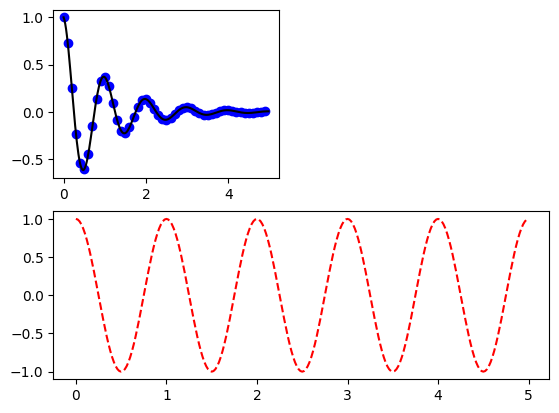

In [8]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure() # call here is optional because a figure will be created if none exists, 
# just as an Axes will be created (equivalent to an explicit subplot() call) if none exists.
plt.subplot(221) # specifies numrows, numcols, plot_number where plot_number ranges from 1 to numrow*numcols
# plt.subplot(221) identical to plt.subplot(2, 1, 1)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

- The figure call here is optional because a figure will be created if none exists, just as an Axes will be created (equivalent to an explicit **subplot()** call) if none exists. The subplot call specifies numrows, numcols, plot_number where plot_number ranges from 1 to numrows*numcols. The commas in the subplot call are optional if numrows*numcols<10. So **subplot(211)** is identical to **subplot(2, 1, 1)**.
- You can create an arbitrary number of subplots and Axes. If you want to place an Axes manually, i.e., not on a rectangular grid, use axes , which allows you to specify the location as **axes([left, bottom, width, height])** where all values are in a fractional(0 to 1) coordinates.
- You can create multiple figures by using multiple figure calls with an increasing figure number. Of course, each figure can contain as many Axes and subplots as your heart desires.

Text(0.5, 1.0, 'Easy as 1, 2, 3')

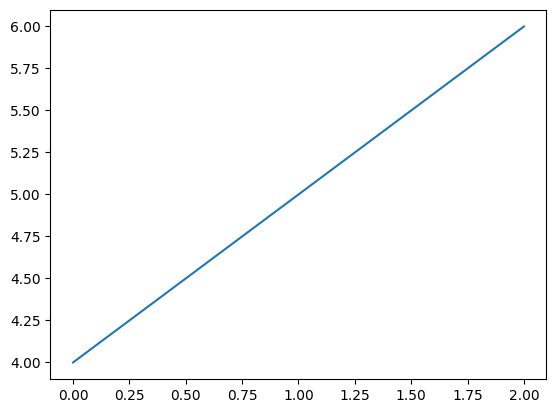

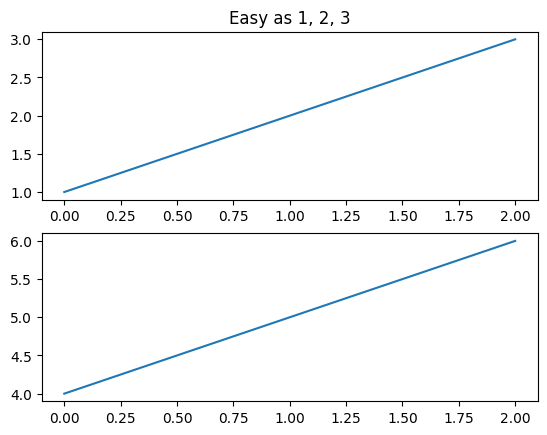

In [9]:
plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(212)             # the second subplot in the first figure
plt.plot([4, 5, 6])


plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot() by default

plt.figure(1)                # first figure current;
                             # subplot(212) still current
plt.subplot(211)             # make subplot(211) in the first figure
                             # current
plt.title('Easy as 1, 2, 3') # subplot 211 title

- You can clear the current figure with clf and the current Axes with cla. If you find it annoying that states (specifically the current image, figure and Axes) are being maintained for you behind the scenes, don't despair: this is just a thin stateful wrapper around an object-oriented API, which you can use instead (see Artist tutorial)
- If you are making lots of figures, you need to be aware of one more thing: the memory required for a figure is not completely released until the figure is explicitly closed with close. Deleting all references to the figure, and/or using the window manager to kill the window in which the figure appears on the screen, is not enough, because pyplot maintains internal references until close is called.

#### Working with text
- plt.text() can be used to add text in an arbitrary location and plt.xlabel, plt.ylabel, and plt.title are used to add text in the indicated locations

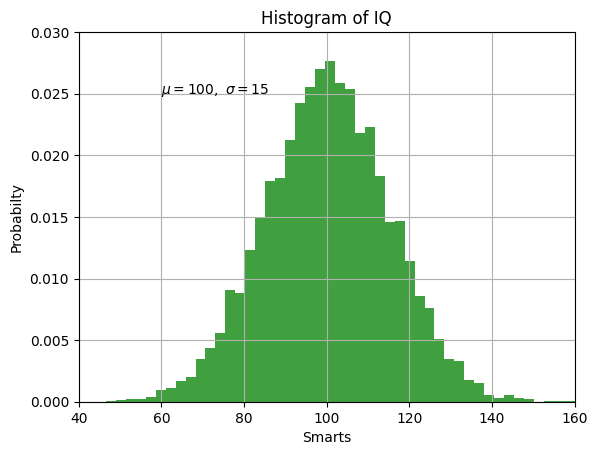

In [11]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=True, facecolor='green', alpha=0.75)

plt.xlabel("Smarts")
plt.ylabel("Probabilty")
plt.title("Histogram of IQ")
plt.text(60, .025, r"$\mu=100, \ \sigma=15$") # place the text at x = 60 and y = 0.025
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

- All of the text functions return a matplotlib.text.Text instance. Just as with lines above, you can customize the properties by passing keyword arguments into the text functions or using setp:

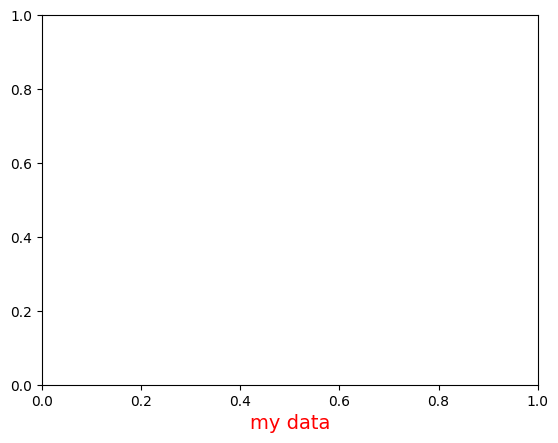

In [12]:
t = plt.xlabel('my data', fontsize=14, color='red')

- These properties are covered in more detail in Text properties and layout.
#### Using mathematical expressions in text
- plt accepts TeX equation expressions in any text expression. For example to write the expression 0i = 15 in the title, you can write a TeX expression surrounded by dollar signs:
```python
plt.title(r'$\sigma_i=15%')
```
- The r preceding the title string is important -- it signifies that the string is a raw string and not to treat backlashes as python escapes. Matplotlib has a built-in TeX expression parser and layout engine, and ships its own math fonts. Thus, you can use mathematical text across platforms without requiring a TeX installation. For those who have LaTeX and dviping installed, you can also you LaTeX to format your text and incorporate the output directly into your display figures or saved postscript.

### Annotating Text
- The uses of the basic text function above place text at an arbitrary position on the Axes. A common use for text is to annotate some feature of the plot, and the annotate method provides  helper functionality to make annotation easy. In an annotation, there are two points to consider: the location being annotated represented by the argument xy and the location of the text xytext. Both of these arguments are (x, y) tuples.

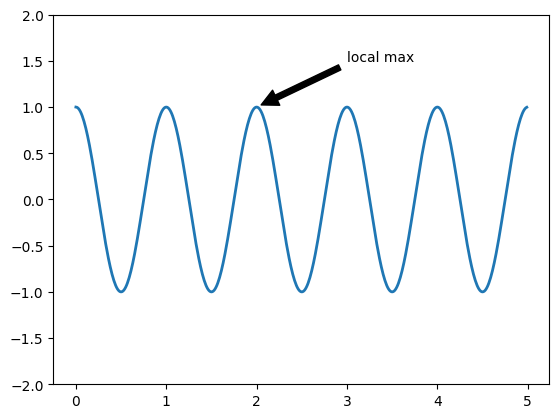

In [13]:
ax = plt.subplot()

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05))

# both xy (arrow tip) and xytext locations (text location) are in data coordinates.
# There are a variety of other coordinate systems one can choose.

plt.ylim(-2, 2)
plt.show()


- In this basic example, both the xy (arrow tip) and xytext locations (text location) are in data coordinates. There are a variety of other coordinate systems one can choose -- see Basic annotation and Advanced annotation for details. More examples can be found in Annotate plots.

### Logarithmic and other nonlinear axes
- matplotlib.pyplot supports not only linear axis scales, but also logarithmic and logit scales. This is commonly used if data spans many orders of magnitude. Change the scale of an axis is easy:
```python
plt.xscale('log')
```
- An example of four plots with the same data and different scales for the y-axis is shown below.

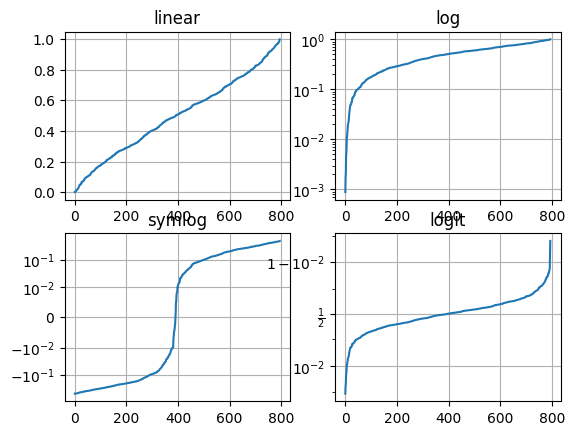

In [14]:
# Fixing random state for reproducibility
np.random.seed(42)

# make up some data in the open interval (0, 1)
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure()

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)

# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)

# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthresh=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)

# Adjust the subplot layout, because the logit one may take more space 
# than usual, due to y-tick labels like "1 -10^{-3}"
plt.show()

## Image Tutorial
- From https://matplotlib.org/stable/tutorials/images.html
- A short tutorial on plotting images with Matplotlib

#### Startup commands
- First, let's start IPython. It is a most excellent enhancement to the standard Python prompt, and it ties in especially well with Matplotlib. Start IPython either directly at a shell, or with the Jupyter Notebook (where IPython as a running kernel).
- With IPython started, we now need to connect to a GUI event loop. This tells IPython where (and how) to display plots. To connect to a GUI loop, execute the %matplotlib magic at your IPython prompt. There's more detail on exactly what this does at IPython's documentation on GUI event loops.
- If you're using Jupyter Notebook, the same commands are available, but people commonly use a specific argument to the %matplotlib magic:
```python
%matplotlib inline
```
- This turns on inline plotting, where plot graphics will appear in your notebook. This has important implications for interactivity. For inline plotting, commands in cells below the cell that outputs a plot will not affect the plot. For example, changing the colormap is not possible from cells below the cell that creates a plot. However, for other backends, such as Qt, that open a separate window, cells below those that create the plot will change the plot - it is a live object in memory.

- This tutorial will use Matplotlib's implicit plotting interface, pyplot. This interface maintains global state, and is very useful for quickly and easily experimenting with various plot settings. The alternative is the explicit, which is more suitable for large application development. For an explanation of the tradeoffs between the implicit and explicit interfaces see Matplotlib Application Interfaces (APIs) and the Quick start guide to start using the explicit interface. For now, let's get on with the implicit approach:

In [15]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

#### Importing image data into Numpy arrays
- Matplotlib relies on the Pillow library to load image data.
- Here's the image we're going to play with:
- It's a 24-bit RGB PNG image (8 bits for each of R, G, B). Depending on where you get your data, the other kinds of image that you'll most likely encounter are RGBA images, which allow for transparency, or single-channel grayscale (luminosity) images. Download stinkbug.png to your computer for the rest of this tutorial.
- We use Pillow to open an image (with PIL.Image.open), and immediately convert the PIL.Image.Image object into an 8-bit (dtype=uint8) numpy array.

In [22]:
img = np.asarray(Image.open("images/stinkbug.png"))
print(repr(img))

array([[[104, 104, 104],
        [104, 104, 104],
        [104, 104, 104],
        ...,
        [109, 109, 109],
        [109, 109, 109],
        [109, 109, 109]],

       [[105, 105, 105],
        [105, 105, 105],
        [105, 105, 105],
        ...,
        [109, 109, 109],
        [109, 109, 109],
        [109, 109, 109]],

       [[107, 107, 107],
        [106, 106, 106],
        [106, 106, 106],
        ...,
        [110, 110, 110],
        [110, 110, 110],
        [110, 110, 110]],

       ...,

       [[112, 112, 112],
        [111, 111, 111],
        [110, 110, 110],
        ...,
        [116, 116, 116],
        [115, 115, 115],
        [115, 115, 115]],

       [[113, 113, 113],
        [113, 113, 113],
        [112, 112, 112],
        ...,
        [115, 115, 115],
        [114, 114, 114],
        [114, 114, 114]],

       [[113, 113, 113],
        [115, 115, 115],
        [115, 115, 115],
        ...,
        [114, 114, 114],
        [114, 114, 114],
        [113, 113, 113]]

- Each inner list represents a pixel. Here, with an RGB image, there are 3 values. Since it's a black and white image, R, G, and B are all similar. An RGBA (where A is alpha, or transparency) has 4 values per inner list, and a simple luminance image just has one value (and is thus only a 2-D array, not a 3-D array). For RGB and RGBA images, Matplotlib supports float32 and uint8 data types. For grayscale, Matplotlib supports only float32. If your array data does not meet one of these descriptions, you need to rescale it.

#### Plotting numpy arrays as images
- So, you have your data in a numpy array (either by importing it, or by generating it). Let's render it. In Matplotlib, this is performed using the imshow() function. Here we'll grab the plot object. This object gives you an easy way to manipulate the plot from the prompt.

In [23]:
img.shape

(375, 500, 3)

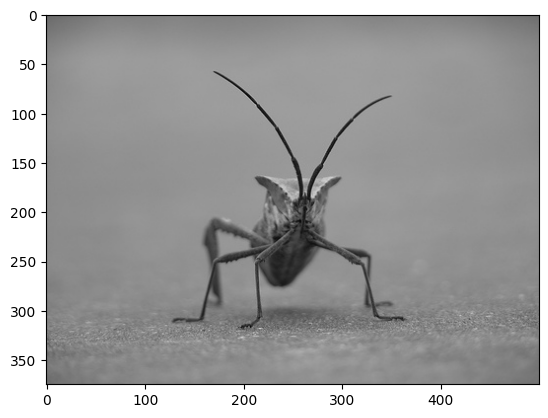

In [ ]:
imgplot = plt.imshow(img)
plt.show()

- You can also plot any numpy array.

#### Applying pseudocolor schemes to image plots
- Pseudocolor can be a useful tool for enhancing contrast and visualizing your data more easily. This is especially useful when making presentations of your data using projectors - their contrast is typically quite poor.

- Pseudocolor is only relevant to single-channel, grayscale, luminosity images. We currently have an RGB image. Since R, G, and B are all similar (see for yourself above or in your data), we can just pick one channel of our data using array slicing (you can read more in the Numpy tutorial):

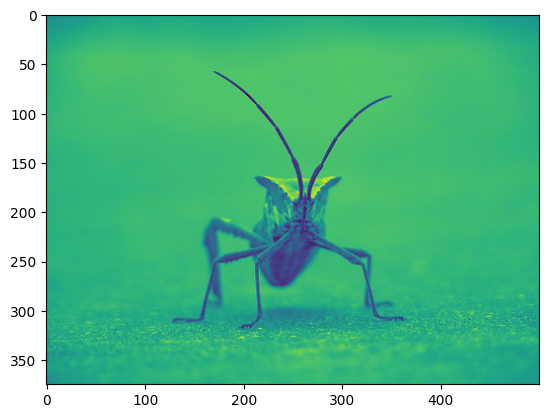

In [ ]:
lum_img = img[:, :, 0]
plt.imshow(lum_img)
plt.show()

- Now, with a luminosity (2D, no color) image, the default colormap (aka lookup table, LUT), is applied. The default is called viridis. There are plenty of others to choose from.

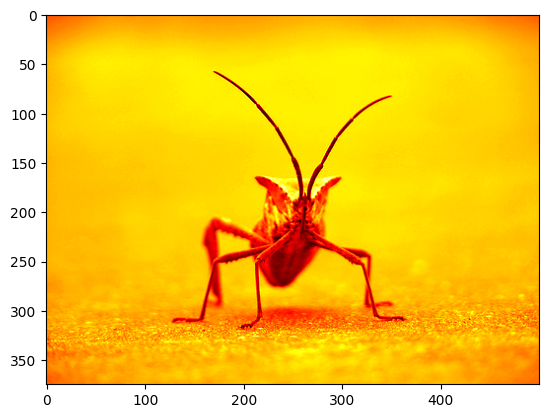

In [ ]:
plt.imshow(lum_img, cmap="hot")
plt.show()

- Note that you can also change colormaps on existing plot objects using the **set_cmap()** method:

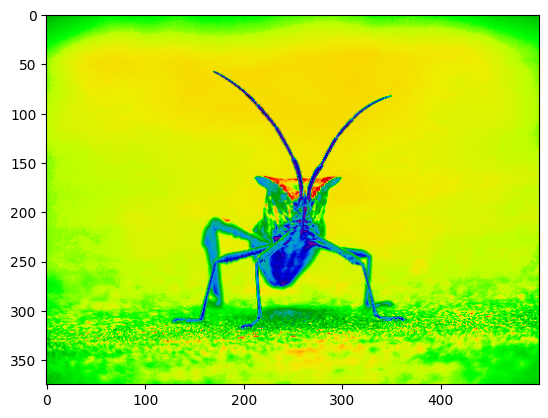

In [27]:
imgplot = plt.imshow(lum_img)
imgplot.set_cmap('nipy_spectral')

- **Note**: However, remember that in the Jupyter Notebook with the inline backend, you can't make changes to plots that have already been rendered. If you create imgplot here in one cell, you cannot call **set_cmap()** on it in a later cell and expect the earlier plot to change. Make sure that you enter these commands together in one cell. plt commands will not change plots from earlier cells.
- There are many other colormap schemes available. See the list and images of the colormaps.
#### Color scale reference
- It's helpful to have an idea of what value a color represents. We can do that by adding a color bar to your figure:

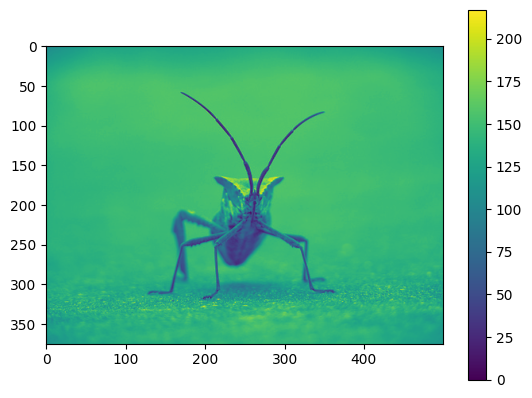

In [31]:
imgplot = plt.imshow(lum_img)
plt.colorbar()
plt.show()

#### Examining a specific data range
Sometimes you want to enhance the contrast in your image, or expand the contrast in a particular region while sacrificing the detail in colors that don't vary much, or don't matter. A good tool to find interesting regions is the histogram. To create a histogram of our image data, we use the **hist()** function.

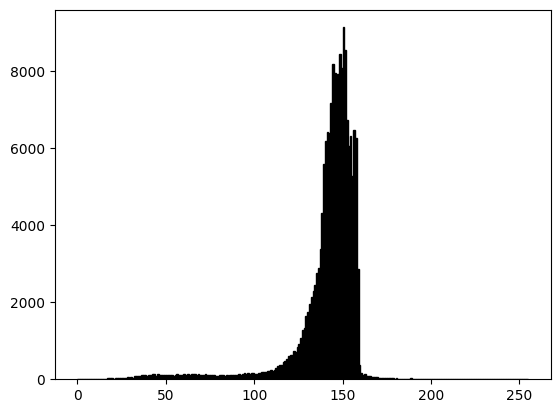

In [30]:
plt.hist(lum_img.ravel(), bins=range(256), fc='k', ec='k')
plt.show()

- Most often, the "interesting" part of the image is around the peak, and you can get extra contrast by clipping the regions above and/or below the peak. In our histogram, it looks like there's not much useful information in the high end (not many white things in the image). Let's adjust the upper limit, so that we effectively "zoom in on" part of the histogram. We do this by setting clim, the colormap limits.

- This can be done by passing a clim keyword argument in the call to imshow.

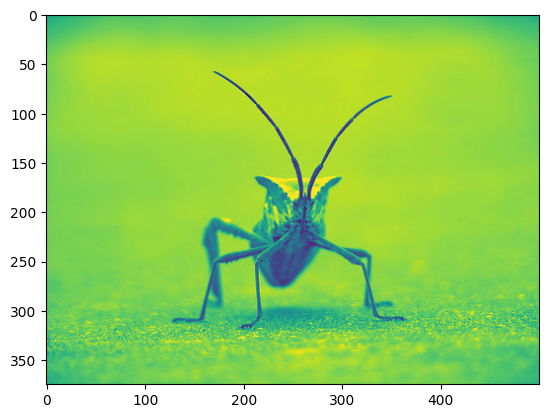

In [32]:
plt.imshow(lum_img, clim=(0, 175))
plt.show()

- This can also be done by calling the set_clim() method of the returned image plot object, but make sure that you do so in the same cell as your plot command when working with the Jupyter Notebook - it will not change plots from earlier cells.

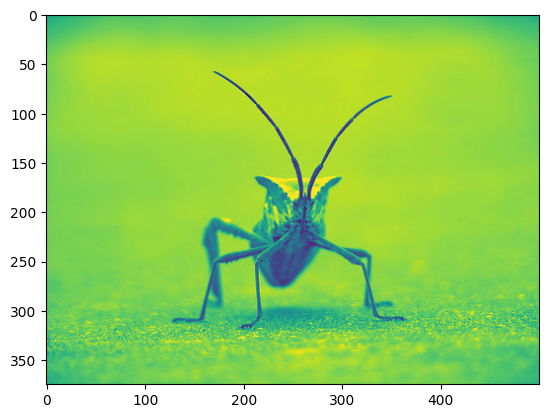

In [33]:
imgplot = plt.imshow(lum_img)
imgplot.set_clim(0, 175)
plt.show()

#### Array Interpolation schemes
- Interpolation calculates what the color or value of a pixel "should" be, according to different mathematical schemes. One common place that this happens is when you resize an image. The number of pixels change, but you want the same information. Since pixels are discrete, there's missing space. Interpolation is how you fill that space. This is why your images sometimes come out looking pixelated when you blow them up. The effect is more pronounced when the difference between the original image and the expanded image is greater. Let's take our image and shrink it. We're effectively discarding pixels, only keeping a select few. Now when we plot it, that data gets blown up to the size on your screen. The old pixels aren't there anymore, and the computer has to draw in pixels to fill that space.

- We'll use the Pillow library that we used to load the image also to resize the image.

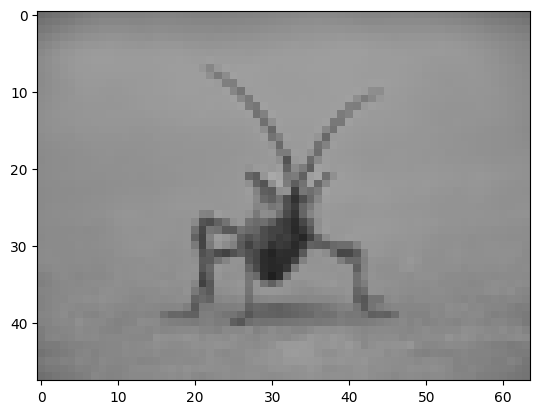

In [34]:
img = Image.open('images/stinkbug.png')
img.thumbnail((64, 64))  # resizes image in-place
imgplot = plt.imshow(img)
plt.show()

- Here we use the default interpolation ("nearest"), since we did not give imshow() any interpolation argument.
- Let's try some others. Here's "bilinear":

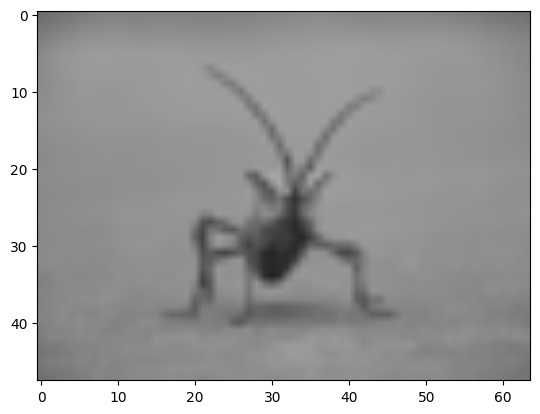

In [35]:
imgplot = plt.imshow(img, interpolation="bilinear")
plt.show()

- and bicubic:

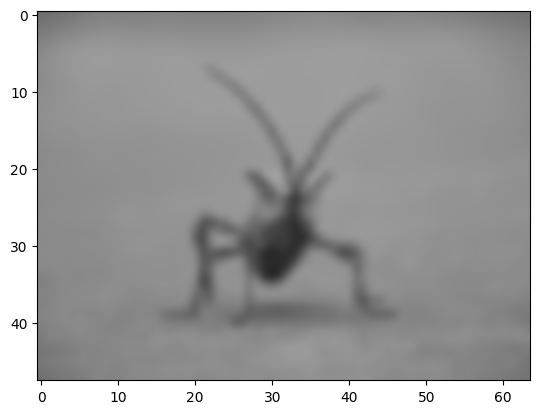

In [36]:
imgplot = plt.imshow(img, interpolation="bicubic")
plt.show()

- Bicubic interpolation is often used when blowing up photos - people tend to prefer blurry over pixelated.

### The Lifecycle of a Plot
- from https://matplotlib.org/stable/tutorials/lifecycle.html
- This tutorial aims to show the beginning, middle, and end of a single visualization using Matplotlib. We'll begin with some raw data and end by saving a figure of a customized visualization. Along the way we try to highlight some neat features and best-practices using Matplotlib.
- **Note**: This tutorial is based on this excellent blog post by Chris Moffitt. It was transformed into this tutorial by Chris Holdgraf.

### A note on the explicit vs. implicit interfaces
Matplotlib has two interfaces. For an explanation of the trade-offs between the explicit and implicit interfaces see Matplotlib Application Interfaces (APIs).
- In the explicit object-oriented (OO) interface we directly utilize instances of axes.Axes to build up the visualization in an instance of figure.Figure. In the implicit interface, inspired by and modeled on MATLAB, we use a global state-based interface which is encapsulated in the pyplot module to plot to the "current Axes". See the pyplot tutorials for a more in-depth look at the pyplot interface.
- Most of the terms are straightforward but the main thing to remember is that:
    - The Figure is the final image, and may contain one or more Axes.
    - The Axes represents an individual plot (not to be confused with
Axis, which refers to the x-, y-, or z-axis of a plot).
- We call methods that do the plotting directly from the Axes, which gives us much more flexibility and power in customizing our plot.

- **Note**: In general, use the explicit interface over the implicit pyplot interface for plotting.

#### Our data
- We'll use the data from the post from which this tutorial was derived. It contains sales information for a number of companies.

In [37]:
data = {'Barton LLC': 109438.50,
        'Frami, Hills and Schmidt': 103569.59,
        'Fritsch, Russel and Anderson': 112214.71,
        'Jerde-Hilpert': 112591.43,
        'Keeling LLC': 100934.30,
        'Koepp Ltd': 103660.54,
        'Kulas Inc': 137351.96,
        'Trantow-Barrows': 123381.38,
        'White-Trantow': 135841.99,
        'Will LLC': 104437.60}
group_data = list(data.values())
group_names = list(data.keys())
group_mean = np.mean(group_data)

#### Getting started
- This data is naturally visualized as a barplot, with one bar per group. To do this with the object-oriented approach, we first generate an instance of figure.Figure and axes.Axes. The Figure is like a canvas, and the Axes is a part of that canvas on which we will make a particular visualization.
- **Note**: Figures can have multiple Axes on them. For information on how to do this, see the Tight Layout tutorial.

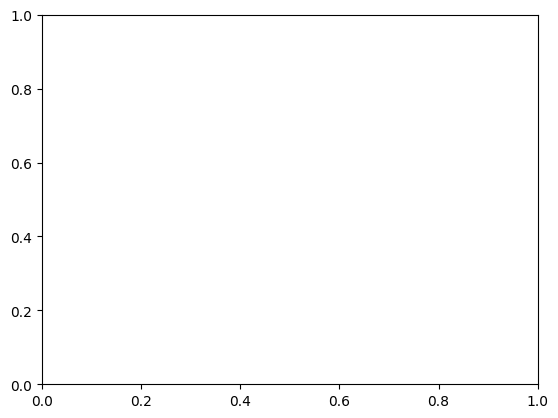

In [38]:
fig, ax = plt.subplots()
plt.show()

- Now that we have an Axes instance, we can plot on top of it.

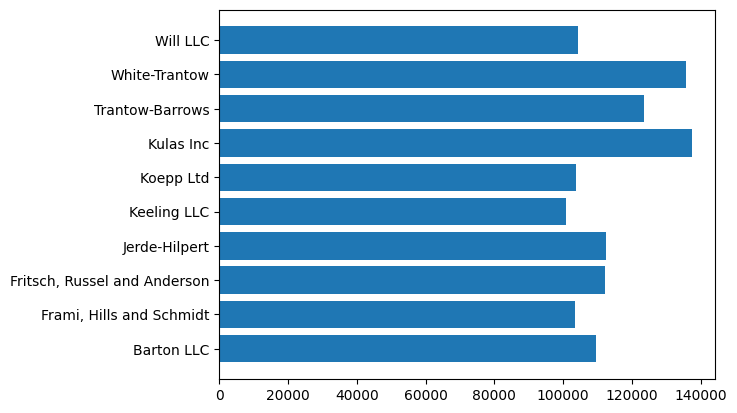

In [39]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)
plt.show()

#### Controlling the style
- There are many styles available in Matplotlib in order to let you tailor your visualization to your needs. To see a list of styles, we can use style.

In [40]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


- You can activate a style with the following:

In [41]:
plt.style.use('fivethirtyeight')

- Now let's remake the above plot to see how it looks:

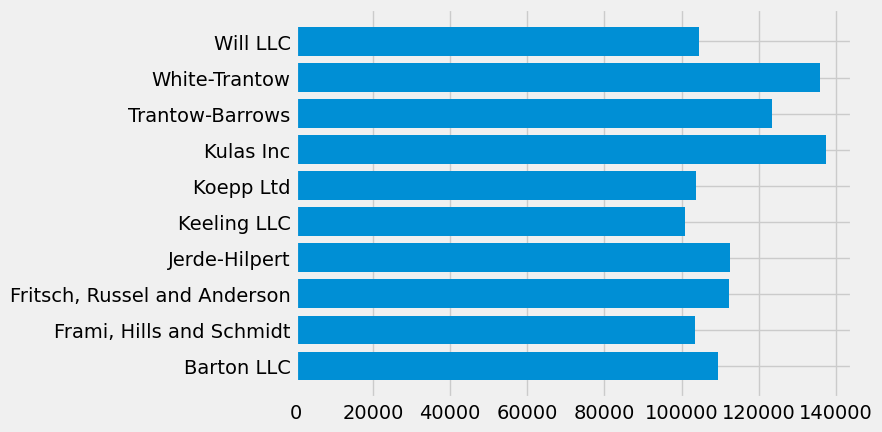

In [42]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)
plt.show()

- The style controls many things, such as color, linewidths, backgrounds, etc.

#### Customizing the plot
- Now we've got a plot with the general look that we want, so let's fine-tune it so that it's ready for print. First let's rotate the labels on the x-axis so that they show up more clearly. We can gain access to these labels with the **axes.Axes.get_xticklabels()** method:

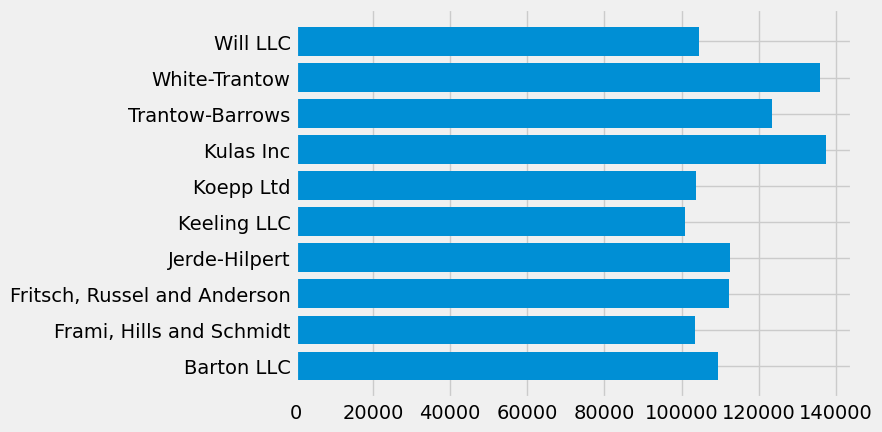

In [43]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.show()

- If we'd like to set the property of many items at once, it's useful to use the **pyplot.setp()** function. This will take a list (or many lists) of Matplotlib objects, and attempt to set some style element of each one.

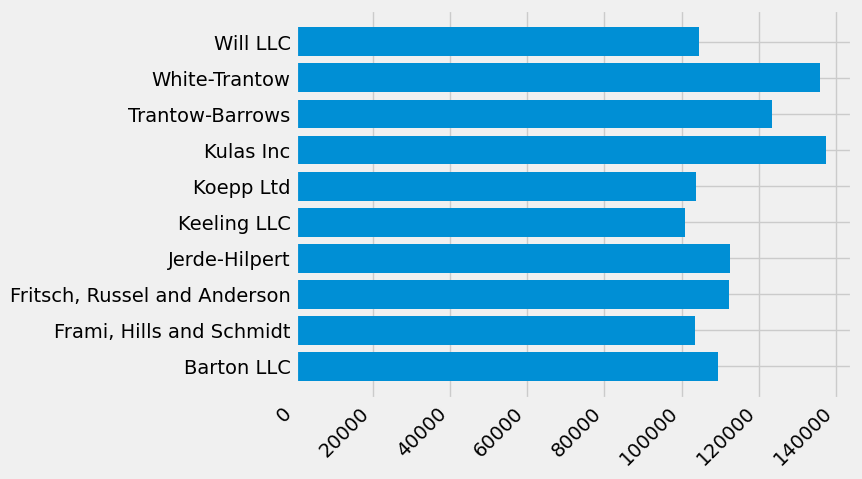

In [44]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
plt.show()

- It looks like this cut off some of the labels on the bottom. We can tell Matplotlib to automatically make room for elements in the figures that we create. To do this we set the autolayout value of our rcParams. For more information on controlling the style, layout, and other features of plots with rcParams, see Customizing Matplotlib with style sheets and rcParams.

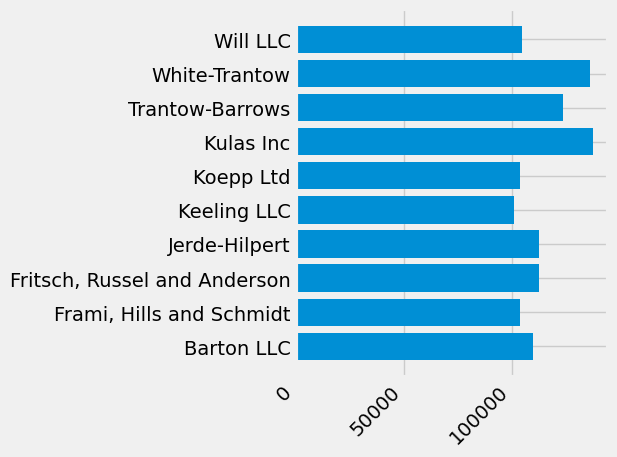

In [45]:
plt.rcParams.update({'figure.autolayout': True})

fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
plt.show()

- Next, we add labels to the plot. To do this with the OO interface, we can use the Artist.set() method to set properties of this Axes object.

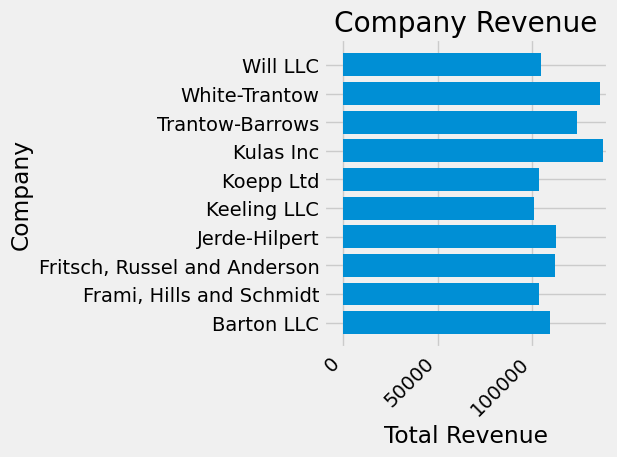

In [46]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')
plt.show()

- We can also adjust the size of this plot using the pyplot.subplots() function. We can do this with the figsize keyword argument.
- **Note**: While indexing in NumPy follows the form (row, column), the figsize keyword argument follows the form (width, height). This follows conventions in visualization, which unfortunately are different from those of linear algebra.

[(-10000.0, 140000.0),
 Text(0.5, 0, 'Total Revenue'),
 Text(0, 0.5, 'Company'),
 Text(0.5, 1.0, 'Company Revenue')]

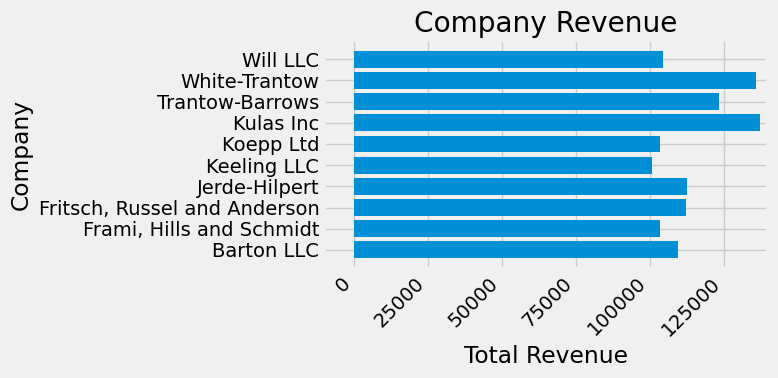

In [47]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')

- For labels, we can specify custom formatting guidelines in the form of functions. Below we define a function that takes an integer as input, and returns a string as an output. When used with Axis.set_major_formatter or Axis.set_minor_formatter, they will automatically create and use a ticker.FuncFormatter class.
- For this function, the x argument is the original tick label and pos is the tick position. We will only use x here but both arguments are needed.

In [48]:
def currency(x, pos):
    """The two arguments are the value and tick position"""
    if x >= 1e6:
        s = f'${x*1e-6:1.1f}M'
    else:
        s = f'${x*1e-3:1.0f}K'
    return s


- We can then apply this function to the labels on our plot. To do this, we use the xaxis attribute of our Axes. This lets you perform actions on a specific axis on our plot.

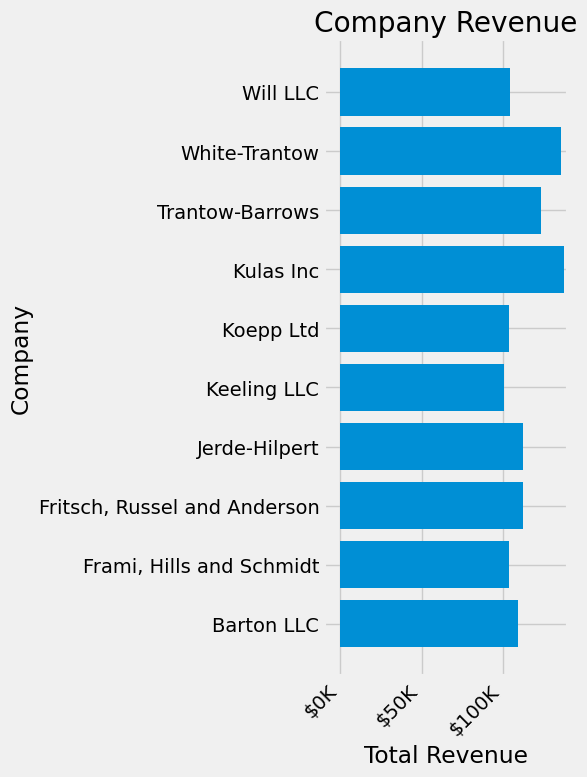

In [49]:
fig, ax = plt.subplots(figsize=(6, 8))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')
ax.xaxis.set_major_formatter(currency)
plt.show()

#### Combining multiple visualizations
- It is possible to draw multiple plot elements on the same instance of axes.Axes. To do this we simply need to call another one of the plot methods on that Axes object.

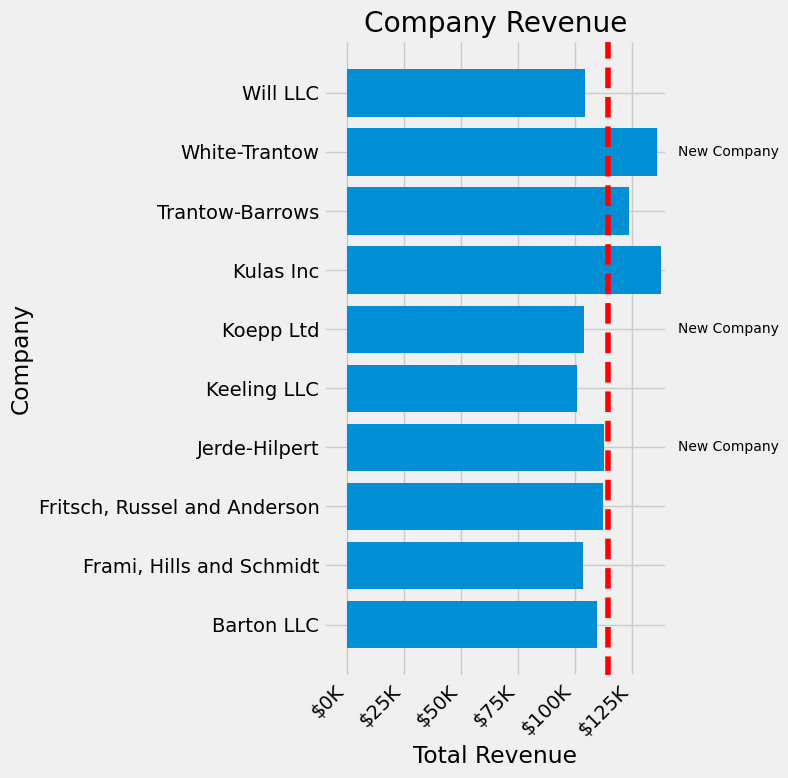

In [50]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

# Add a vertical line, here we set the style in the function call
ax.axvline(group_mean, ls='--', color='r')

# Annotate new companies
for group in [3, 5, 8]:
    ax.text(145000, group, "New Company", fontsize=10,
            verticalalignment="center")

# Now we move our title up since it's getting a little cramped
ax.title.set(y=1.05)

ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')
ax.xaxis.set_major_formatter(currency)
ax.set_xticks([0, 25e3, 50e3, 75e3, 100e3, 125e3])
fig.subplots_adjust(right=.1)

plt.show()

#### Saving our plot
- Now that we're happy with the outcome of our plot, we want to save it to disk. There are many file formats we can save to in Matplotlib. To see a list of available options, use:

In [51]:
print(fig.canvas.get_supported_filetypes())

{'eps': 'Encapsulated Postscript', 'jpg': 'Joint Photographic Experts Group', 'jpeg': 'Joint Photographic Experts Group', 'pdf': 'Portable Document Format', 'pgf': 'PGF code for LaTeX', 'png': 'Portable Network Graphics', 'ps': 'Postscript', 'raw': 'Raw RGBA bitmap', 'rgba': 'Raw RGBA bitmap', 'svg': 'Scalable Vector Graphics', 'svgz': 'Scalable Vector Graphics', 'tif': 'Tagged Image File Format', 'tiff': 'Tagged Image File Format', 'webp': 'WebP Image Format'}


- We can then use the figure.Figure.savefig() in order to save the figure to disk. Note that there are several useful flags we show below:
    - transparent=True makes the background of the saved figure transparent if the format supports it.
    - dpi=80 controls the resolution (dots per square inch) of the output.
    - bbox_inches="tight" fits the bounds of the figure to our plot.

In [52]:
# Uncomment this line to save the figure.
# fig.savefig('sales.png', transparent=False, dpi=80, bbox_inches="tight")

### Artist tutorial
- from https://matplotlib.org/stable/tutorials/artists.html
- Using Artist objects to render on the canvas.
- There are three layers to the Matplotlib API.
    - the matplotlib.backend_bases.FigureCanvas is the area onto which the figure is drawn
    - the matplotlib.backend_bases.Renderer is the object which knows how to draw on the matplotlib.backend_bases.FigureCanvas
    - and the matplotlib.artist.Artist is the object that knows how to use a renderer to paint onto the canvas.

- The matplotlib.backend_bases.FigureCanvas and matplotlib.backend_bases.Renderer handle all the details of talking to user interface toolkits like wxPython or drawing languages like PostScript®, and the Artist handles all the high level constructs like representing and laying out the figure, text, and lines. The typical user will spend 95% of their time working with the Artists.

- There are two types of Artists: primitives and containers. The primitives represent the standard graphical objects we want to paint onto our canvas: Line2D, Rectangle, Text, AxesImage, etc., and the containers are places to put them (Axis, Axes and Figure). The standard use is to create a Figure instance, use the Figure to create one or more Axes instances, and use the Axes instance helper methods to create the primitives. In the example below, we create a Figure instance using matplotlib.pyplot.figure(), which is a convenience method for instantiating Figure instances and connecting them with your user interface or drawing toolkit FigureCanvas. As we will discuss below, this is not necessary -- you can work directly with PostScript, PDF Gtk+, or wxPython FigureCanvas instances, instantiate your Figures directly and connect them yourselves -- but since we are focusing here on the Artist API we'll let pyplot handle some of those details for us:

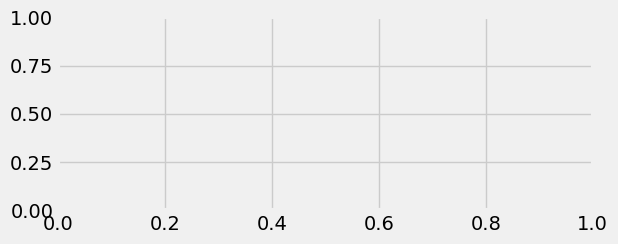

In [53]:
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1) # two rows, one column, first plot
plt.show()

- The Axes is probably the most important class in the Matplotlib API, and the one you will be working with most of the time. This is because the Axes is the plotting area into which most of the objects go, and the Axes has many special helper methods (plot(), text(), hist(), imshow()) to create the most common graphics primitives (Line2D, Text, Rectangle, AxesImage, respectively). These helper methods will take your data (e.g., numpy arrays and strings) and create primitive Artist instances as needed (e.g., Line2D), add them to the relevant containers, and draw them when requested. If you want to create an Axes at an arbitrary location, simply use the add_axes() method which takes a list of [left, bottom, width, height] values in 0-1 relative figure coordinates:

C:\Users\thotc\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


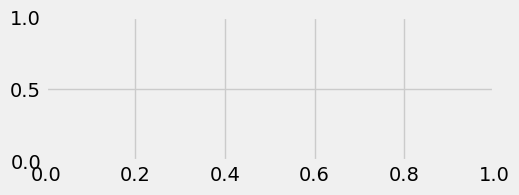

In [55]:
fig2 = plt.figure()
ax2 = fig2.add_axes([0.15, 0.1, 0.7, 0.3])
plt.show()

- Continuing with our example:

In [57]:
import numpy as np
t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*np.pi*t)
line, = ax.plot(t, s, color='blue', lw=2)

- In this example, ax is the Axes instance created by the fig.add_subplot call above and when you call ax.plot, it creates a Line2D instance and adds it to the Axes. In the interactive IPython session below, you can see that the Axes.lines list is length one and contains the same line that was returned by the line, = ax.plot... call:

In [58]:
ax.lines[0]

In [59]:
line

- If you make subsequent calls to ax.plot (and the hold state is "on" which is the default) then additional lines will be added to the list. You can remove a line later by calling its remove method:

In [60]:
line = ax.lines[0]
line.remove()

- The Axes also has helper methods to configure and decorate the x-axis and y-axis tick, tick labels and axis labels:

In [61]:
xtext = ax.set_xlabel('my xdata')  # returns a Text instance
ytext = ax.set_ylabel('my ydata')

- When you call ax.set_xlabel, it passes the information on the Text instance of the XAxis. Each Axes instance contains an XAxis and a YAxis instance, which handle the layout and drawing of the ticks, tick labels and axis labels.
- Try creating the figure below.

C:\Users\thotc\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


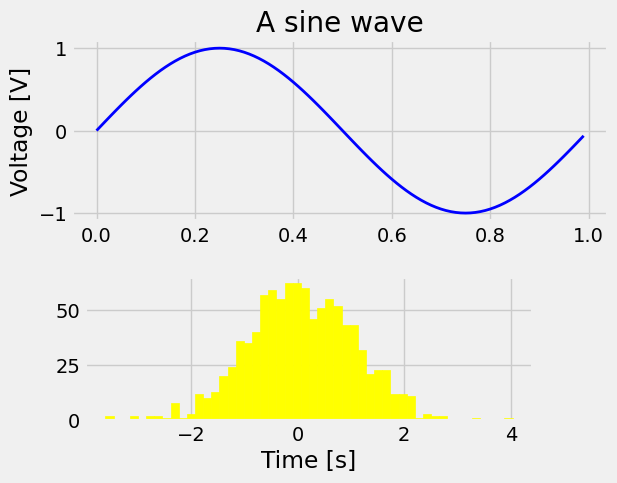

In [62]:

fig = plt.figure()
fig.subplots_adjust(top=0.8)
ax1 = fig.add_subplot(211)
ax1.set_ylabel('Voltage [V]')
ax1.set_title('A sine wave')

t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*np.pi*t)
line, = ax1.plot(t, s, color='blue', lw=2)

# Fixing random state for reproducibility
np.random.seed(19680801)

ax2 = fig.add_axes([0.15, 0.1, 0.7, 0.3])
n, bins, patches = ax2.hist(np.random.randn(1000), 50,
                            facecolor='yellow', edgecolor='yellow')
ax2.set_xlabel('Time [s]')

plt.show()

#### Customizing your objects
- Every element in the figure is represented by a Matplotlib Artist, and each has an extensive list of properties to configure its appearance. The figure itself contains a Rectangle exactly the size of the figure, which you can use to set the background color and transparency of the figures. Likewise, each Axes bounding box (the standard white box with black edges in the typical Matplotlib plot, has a Rectangle instance that determines the color, transparency, and other properties of the Axes. These instances are stored as member variables Figure.patch and Axes.patch ("Patch" is a name inherited from MATLAB, and is a 2D "patch" of color on the figure, e.g., rectangles, circles and polygons). Every Matplotlib Artist has the following properties

| Property | Description |
| alpha | The transparency - a scalar from 0-1 |
| animated | A boolean that is used to facilitate animated drawing |
| axes | The Axes that the Artist lives in, possibly None |
| clip_box | The bounding box that clips the Artist |
| clip_on | Whether clipping is enabled |
| clip_path | The path the artist is clipped to |
| contains | A picking function to test whether the artist contains the pick point |
| figure | The figure instance the artist lives in, possibly None |
| label | A text label (e.g., for auto-labeling) |
| picker | A python object that controls object picking |
| transform | The transformation |
| visible | A boolean whether the artist should be drawn |
| zorder | A number which determines the drawing order |
| rasterized | Boolean; Turns vectors into raster graphics (for compression & EPS transparency) |

- Each of the properties is accessed with an old-fashioned setter or getter (yes we know this irritates Pythonistas and we plan to support direct access via properties or traits but it hasn't been done yet). For example, to multiply the current alpha by a half:

In [65]:
# a = o.get_alpha()
# o.set_alpha(0.5*a)

- If you want to set a number of properties at once, you can also use the set method with keyword arguments. For example:

In [66]:
# o.set(alpha=0.5, zorder=2)

- If you are working interactively at the python shell, a handy way to inspect the Artist properties is to use the matplotlib.artist.getp() function (simply getp() in pyplot), which lists the properties and their values. This works for classes derived from Artist as well, e.g., Figure and Rectangle. Here are the Figure rectangle properties mentioned above:

In [68]:
import matplotlib

matplotlib.artist.getp(fig.patch)

    agg_filter = None
    alpha = None
    angle = 0.0
    animated = False
    antialiased or aa = False
    bbox = Bbox(x0=0.0, y0=0.0, x1=1.0, y1=1.0)
    capstyle = butt
    center = [0.5 0.5]
    children = []
    clip_box = None
    clip_on = True
    clip_path = None
    corners = [[0. 0.]  [1. 0.]  [1. 1.]  [0. 1.]]
    data_transform = BboxTransformTo(     TransformedBbox(         Bbox...
    edgecolor or ec = (1.0, 1.0, 1.0, 1.0)
    extents = Bbox(x0=0.0, y0=0.0, x1=640.0, y1=480.0)
    facecolor or fc = (0.9411764705882353, 0.9411764705882353, 0.9411764...
    figure = Figure(640x480)
    fill = True
    gid = None
    hatch = None
    hatch_linewidth = 1.0
    height = 1
    in_layout = False
    joinstyle = miter
    label = 
    linestyle or ls = solid
    linewidth or lw = 0.0
    mouseover = False
    patch_transform = CompositeGenericTransform(     BboxTransformTo(   ...
    path = Path(array([[0., 0.],        [1., 0.],        [1.,...
    path_effects = []
    picker 

- The docstrings for all of the classes also contain the Artist properties, so you can consult the interactive "help" or the matplotlib.artist for a listing of properties for a given object.

#### Object containers
- Now that we know how to inspect and set the properties of a given object we want to configure, we need to know how to get at that object. As mentioned in the introduction, there are two kinds of objects: primitives and containers. The primitives are usually the things you want to configure (the font of a Text instance, the width of a Line2D) although the containers also have some properties as well -- for example the Axes Artist is a container that contains many of the primitives in your plot, but it also has properties like the xscale to control whether the xaxis is 'linear' or 'log'. In this section we'll review where the various container objects store the Artists that you want to get at.

#### Figure container
- The top level container Artist is the matplotlib.figure.Figure, and it contains everything in the figure. The background of the figure is a Rectangle which is stored in Figure.patch. As you add subplots (add_subplot()) and Axes (add_axes()) to the figure these will be appended to the Figure.axes. These are also returned by the methods that create them:

<Axes: >

C:\Users\thotc\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
C:\Users\thotc\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


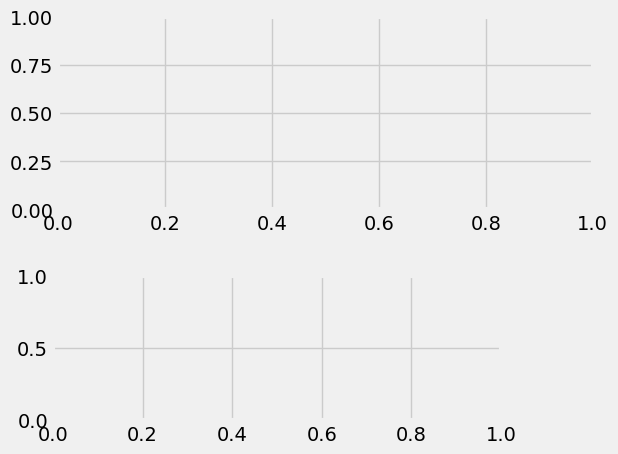

In [69]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.3])
ax1

In [70]:
print(fig.axes)

[<Axes: >, <Axes: >]


- Because the figure maintains the concept of the "current Axes" (see Figure.gca and Figure.sca) to support the pylab/pyplot state machine, you should not insert or remove Axes directly from the Axes list, but rather use the add_subplot() and add_axes() methods to insert, and the Axes.remove method to delete. You are free however, to iterate over the list of Axes or index into it to get access to Axes instances you want to customize. Here is an example which turns all the Axes grids on:

In [71]:
for ax in fig.axes:
    ax.grid(True)

- The figure also has its own images, lines, patches and text attributes, which you can use to add primitives directly. When doing so, the default coordinate system for the Figure will simply be in pixels (which is not usually what you want). If you instead use Figure-level methods to add Artists (e.g., using Figure.text to add text), then the default coordinate system will be "figure coordinates" where (0, 0) is the bottom-left of the figure and (1, 1) is the top-right of the figure.

- As with all Artists, you can control this coordinate system by setting the transform property. You can explicitly use "figure coordinates" by setting the Artist transform to fig.transFigure:

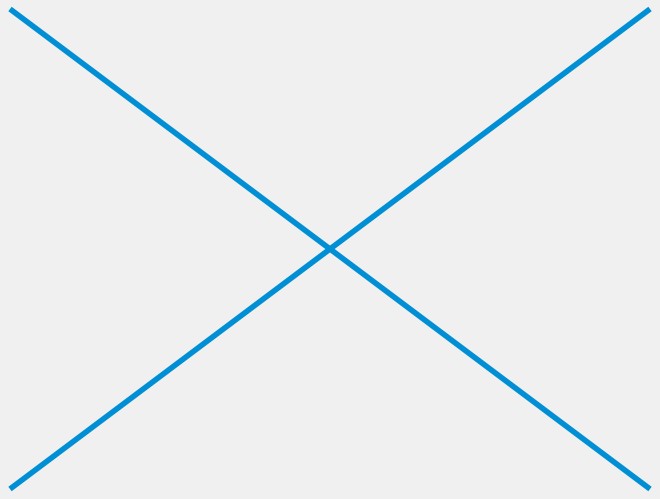

In [72]:
import matplotlib.lines as lines

fig = plt.figure()

l1 = lines.Line2D([0, 1], [0, 1], transform=fig.transFigure, figure=fig)
l2 = lines.Line2D([0, 1], [1, 0], transform=fig.transFigure, figure=fig)
fig.lines.extend([l1, l2])

plt.show()

- Here is a summary of the Artists the Figure contains

| Figure attribute | Description |
| ---------------- | ----------- |
| axes | A list of Axes instances |
| patch | The Rectangle background |
| images | A list of FigureImage patches - useful for raw pixel display |
| legends | A list of Figure Legend instances (different from Axes.get_legend()) |
| lines | A list of Figure Line2D instances (rarely used, see Axes.lines) |
| patches | A list of Figure Patchs (rarely used, see Axes.patches) |
| texts | A list Figure Text instances |

#### Axes container
- The matplotlib.axes.Axes is the center of the Matplotlib universe -- it contains the vast majority of all the Artists used in a figure with many helper methods to create and add these Artists to itself, as well as helper methods to access and customize the Artists it contains. Like the Figure, it contains a Patch matplotlib.axes.Axes.patch which is a Rectangle for Cartesian coordinates and a Circle for polar coordinates; this patch determines the shape, background and border of the plotting region:

In [73]:
ax = fig.add_subplot()
rect = ax.patch  # a Rectangle instance
rect.set_facecolor('green')

- When you call a plotting method, e.g., the canonical plot and pass in arrays or lists of values, the method will create a matplotlib.lines.Line2D instance, update the line with all the Line2D properties passed as keyword arguments, add the line to the Axes, and return it to you:

In [74]:
x, y = np.random.rand(2, 100)
line, = ax.plot(x, y, '-', color='blue', linewidth=2)

- plot returns a list of lines because you can pass in multiple x, y pairs to plot, and we are unpacking the first element of the length one list into the line variable. The line has been added to the Axes.lines list:

In [75]:
print(ax.lines)

<Axes.ArtistList of 1 lines>


- Similarly, methods that create patches, like bar() creates a list of rectangles, will add the patches to the Axes.patches list:

In [76]:
n, bins, rectangles = ax.hist(np.random.randn(1000), 50)
rectangles

<BarContainer object of 50 artists>

In [77]:
print(len(ax.patches))

50


- You should not add objects directly to the Axes.lines or Axes.patches lists, because the Axes needs to do a few things when it creates and adds an object:
    - It sets the figure and axes property of the Artist;
    - It sets the default Axes transformation (unless one is already set);
    - It inspects the data contained in the Artist to update the data structures controlling auto-scaling, so that the view limits can be adjusted to contain the plotted data.

- You can, nonetheless, create objects yourself and add them directly to the Axes using helper methods like add_line and add_patch. Here is an annotated interactive session illustrating what is going on:

None
IdentityTransform()
Axes(0.08,0.07;0.87x0.81)
CompositeGenericTransform(
    TransformWrapper(
        BlendedAffine2D(
            IdentityTransform(),
            IdentityTransform())),
    CompositeGenericTransform(
        BboxTransformFrom(
            TransformedBbox(
                Bbox(x0=0.0, y0=0.0, x1=1.0, y1=1.0),
                TransformWrapper(
                    BlendedAffine2D(
                        IdentityTransform(),
                        IdentityTransform())))),
        BboxTransformTo(
            TransformedBbox(
                Bbox(x0=0.08, y0=0.06999999999999995, x1=0.95, y1=0.88),
                BboxTransformTo(
                    TransformedBbox(
                        Bbox(x0=0.0, y0=0.0, x1=6.4, y1=4.8),
                        Affine2D().scale(100.0)))))))
CompositeGenericTransform(
    TransformWrapper(
        BlendedAffine2D(
            IdentityTransform(),
            IdentityTransform())),
    CompositeGenericTransform(
        BboxTra

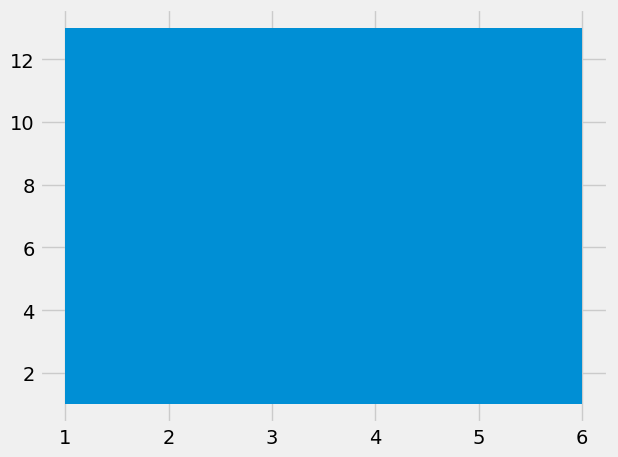

In [78]:
fig, ax = plt.subplots()
# create a rectangle instance
rect = matplotlib.patches.Rectangle((1, 1), width=5, height=12)
# by default the Axes instance is None
print(rect.axes)
# and the transformation instance is set to the "identity transform"
print(rect.get_data_transform())
# now we add the Rectangle to the Axes
ax.add_patch(rect)
# and notice that the ax.add_patch method has set the Axes
# instance
print(rect.axes)
# and the transformation has been set too
print(rect.get_data_transform())
# the default Axes transformation is ax.transData
print(ax.transData)
# notice that the xlimits of the Axes have not been changed
print(ax.get_xlim())
# but the data limits have been updated to encompass the rectangle
print(ax.dataLim.bounds)
# we can manually invoke the auto-scaling machinery
ax.autoscale_view()

# and now the xlim are updated to encompass the rectangle, plus margins
print(ax.get_xlim())
# we have to manually force a figure draw
fig.canvas.draw()

- There are many, many Axes helper methods for creating primitive Artists and adding them to their respective containers. The table below summarizes a small sampling of them, the kinds of Artist they create, and where they store them

| Axes helper method | Artist | Container |
| ------------------ | ------- | --------- |
| annotate - text annotations | Annotation | ax.texts |
| bar - bar charts | Rectangle | ax.patches |
| errorbar - error bar plots | Line2D and Rectangle | ax.lines and ax.patches |
| fill - shared area | Polygon | ax.patches |
| hist - histograms | Rectangle | ax.patches |
| imshow - image data | AxesImage | ax.images |
| legend - Axes legend | Legend | ax.get_legend() |
| plot - xy plots | Line2D | ax.lines |
| scatter - scatter charts | PolyCollection | ax.collections |
| text - text | Text | ax.texts| 

- In addition to all of these Artists, the Axes contains two important Artist containers: the XAxis and YAxis, which handle the drawing of the ticks and labels. These are stored as instance variables matplotlib.axes.Axes.xaxis and matplotlib.axes.Axes.yaxis. The XAxis and YAxis containers will be detailed below, but note that the Axes contains many helper methods which forward calls on to the Axis instances, so you often do not need to work with them directly unless you want to. For example, you can set the font color of the XAxis ticklabels using the Axes helper method:


In [79]:
ax.tick_params(axis='x', labelcolor='orange')


- Below is a summary of the Artists that the Axes contains

| Axes attribute | Description |
| -------------- | ------------ |
| artists | An ArtistList of Artist instances |
| patch | Rectangle instance for Axes background |
| collections | An ArtistList of Collection instances |
| images | An ArtistList of AxesImage |
| lines | An ArtistList of Line2D instances |
| patches | An ArtistList of Patch instances |
| texts | An ArtistList of Text instances |
| xaxis | A matplotlib.axis.XAxis instance |
| yaxis | A matplotlib.axis.YAxis instance|

- The legend can be accessed by get_legend,

#### Axis containers
- The matplotlib.axis.Axis instances handle the drawing of the tick lines, the grid lines, the tick labels and the axis label. You can configure the left and right ticks separately for the y-axis, and the upper and lower ticks separately for the x-axis. The Axis also stores the data and view intervals used in auto-scaling, panning and zooming, as well as the Locator and Formatter instances which control where the ticks are placed and how they are represented as strings.
- Each Axis object contains a label attribute (this is what pyplot modifies in calls to xlabel and ylabel) as well as a list of major and minor ticks. The ticks are axis.XTick and axis.YTick instances, which contain the actual line and text primitives that render the ticks and ticklabels. Because the ticks are dynamically created as needed (e.g., when panning and zooming), you should access the lists of major and minor ticks through their accessor methods axis.Axis.get_major_ticks and axis.Axis.get_minor_ticks. Although the ticks contain all the primitives and will be covered below, Axis instances have accessor methods that return the tick lines, tick labels, tick locations etc.:

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

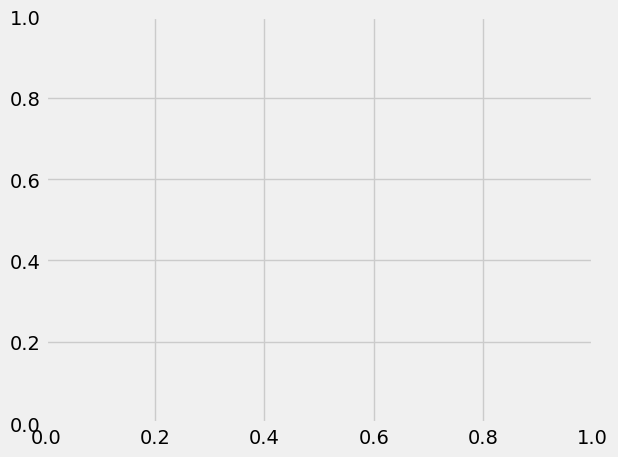

In [80]:
fig, ax = plt.subplots()
axis = ax.xaxis
axis.get_ticklocs()

In [81]:
axis.get_ticklabels()

[Text(0.0, 0, '0.0'),
 Text(0.2, 0, '0.2'),
 Text(0.4, 0, '0.4'),
 Text(0.6000000000000001, 0, '0.6'),
 Text(0.8, 0, '0.8'),
 Text(1.0, 0, '1.0')]

- note there are twice as many ticklines as labels because by default there are tick lines at the top and bottom but only tick labels below the xaxis; however, this can be customized.

In [82]:
axis.get_ticklines()

<a list of 12 Line2D ticklines objects>

- And with the above methods, you only get lists of major ticks back by default, but you can also ask for the minor ticks:

In [83]:
axis.get_ticklabels(minor=True)
axis.get_ticklines(minor=True)

<a list of 0 Line2D ticklines objects>

- Here is a summary of some of the useful accessor methods of the Axis (these have corresponding setters where useful, such as set_major_formatter().)

| Axis accessor method | Description |
| ------------------ | ------------- |
| get_scale | The scale of the Axis, e.g., 'log' or 'linear' |
| get_view_interval | The interval instance of the Axis view limits |
| get_data_interval | The interval instance of the Axis data limits |
| get_gridlines | A list of grid lines for the Axis |
| get_label | The Axis label - a Text instance |
| get_offset_text | The Axis offset text - a Text instance |
| get_ticklabels | A list of Text instances - keyword minor=True|False |
| get_ticklines | A list of Line2D instances - keyword minor=True|False |
| get_ticklocs | A list of Tick locations - keyword minor=True|False |
| get_major_locator | The ticker.Locator instance for major ticks |
| get_major_formatter | The ticker.Formatter instance for major ticks |
| get_minor_locator | The ticker.Locator instance for minor ticks |
| get_minor_formatter | The ticker.Formatter instance for minor ticks |
| get_major_ticks | A list of Tick instances for major ticks |
| get_minor_ticks | A list of Tick instances for minor ticks|
| grid | Turn the grid on or off for the major or minor ticks| 

- Here is an example, not recommended for its beauty, which customizes the Axes and Tick properties.

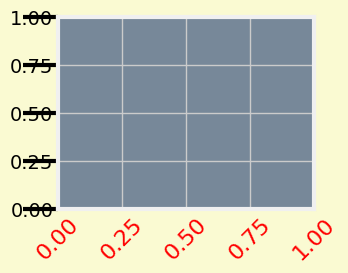

In [84]:
# plt.figure creates a matplotlib.figure.Figure instance
fig = plt.figure()
rect = fig.patch  # a rectangle instance
rect.set_facecolor('lightgoldenrodyellow')

ax1 = fig.add_axes([0.1, 0.3, 0.4, 0.4])
rect = ax1.patch
rect.set_facecolor('lightslategray')


for label in ax1.xaxis.get_ticklabels():
    # label is a Text instance
    label.set_color('red')
    label.set_rotation(45)
    label.set_fontsize(16)

for line in ax1.yaxis.get_ticklines():
    # line is a Line2D instance
    line.set_color('green')
    line.set_markersize(25)
    line.set_markeredgewidth(3)

plt.show()

#### Tick containers
- The matplotlib.axis.Tick is the final container object in our descent from the Figure to the Axes to the Axis to the Tick. The Tick contains the tick and grid line instances, as well as the label instances for the upper and lower ticks. Each of these is accessible directly as an attribute of the Tick.

| Tick attribute | Description |
| tick1line | A Line2D instance |
| tick2line | A Line2D instance |
| gridline | A Line2D instance |
| label1 | A Text instance |
| label2 | A Text instance|

- Here is an example which sets the formatter for the right side ticks with dollar signs and colors them green on the right side of the yaxis.

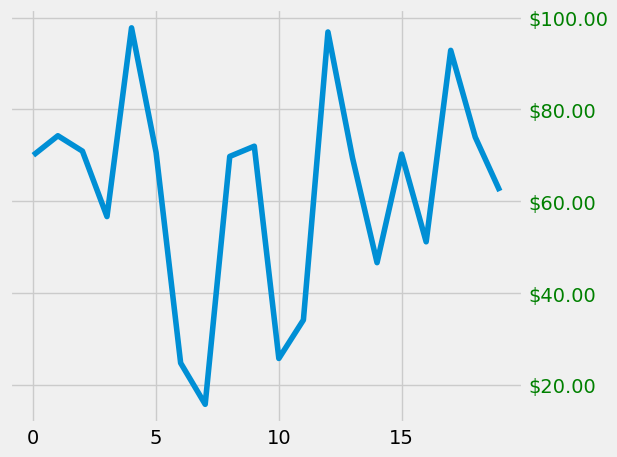

In [85]:
# Fixing random state for reproducibility
np.random.seed(19680801)

fig, ax = plt.subplots()
ax.plot(100*np.random.rand(20))

# Use automatic StrMethodFormatter
ax.yaxis.set_major_formatter('${x:1.2f}')

ax.yaxis.set_tick_params(which='major', labelcolor='green',
                         labelleft=False, labelright=True)

plt.show()

### Matplotlib quick guide
- from https://matplotlib.org/stable/users/explain/quick_start.html

#### A simple example
- Matplotlib graphs your data in Figure(e.g., windows, Jupyter widgets, etc.), each of which can contain one or more Axes, an area where points can be specified in terms of x-y coordinates (or theta-r in a polor plot, x-y-z in 3D plot, etc.). The simplest way of creating a Figure with an Axes is using pyplot.subplots. We can then use Axes.plot to draw some data on the Axes, and show to display the figure:

In [ ]:
fig, ax = plt.subplots() # Create a figure containg a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3]) # plot some data on the Axes.
plt.show() # show the figure

# Parts of a Figure

![Figure](plt_anatomy_of_figure.png)

### Figure
- The figure keeps track of all the child Axes, a group of "special" Artists (titles, figure, legends, colorbars, etc.), and even nested subfigures.

```python
fig = plt.figure() # an empty figure with no Axes
fig, ax = plt.subplots() # a figure with a single Axes
fig, ax = plt.subplots(2, 2) # a figure with a 2x2 grid of Axes
# figure with one Axes on the left, and two on the right:
fig, axs = plt.subplot_mosaic([["left", "right_top"], ["left", "right_bottom"]])
```

### Axes
- An Axes is an Artist attached to a Figure that contains a region for plotting data, and usually includes two (or three in the case 3D) Axis objects (be aware of the difference between Axes and Axis) that provide ticks and tick labels to provide scales for the data in the Axes. Each Axes also has a title (set via set_title()), an x-label (set via set_xlabel()), and a y-label (set via set_ylabel()).
- The Axes methods are the primary interfce for configuring most parts of your plot (adding data, controlling axis scales and limits, adding labels etc.)

### Axis
- These objects set the scale and limits and generate ticks (the marks on the Axis) and ticklabels (strings labeling the ticks). The location of the ticks is determined by a Locator object and the ticklabel strings are formatted by a Formatter. The combination of the correct Locator and Formatter gives very fine control over the tick locations and labels.

### Artist
- Basically, everything visible on the Figure is an Artist (even Figure, Axes, and Axis objects). This includes Text object, Line2D objects, collections objects, Patch objects, etc. When the Figure is rendered, all of the Artists are drawn to the canvas. Most Artists are tied to an Axes; such an Artist cannot be shared by multiple Axes, or moved from one to antoher.

### Types of input to plotting functions
- Plotting functions expect numpy.array or numpy.ma.masked_array as input, or objects that can be passed to numpy.asarray. Classed that are similar to arrays ("array-like") such as pandas data objects and numpy.matrix may not work as intended. Common convention is to convert these to numpy.array objects prior to plotting. For example, to convert a numpy.matrix
```python
b = np.matrix([[1, 2], [3, 4]])
b_asarray = np.asarray(b)
```
- Most methods will also parse a string-indexable object like a dict, a structured numpy array, or a pandas.DataFrame. Matplotlib allows you to provide the data keyword argument and generate plots passing the strings corresponding to the x and y variables.

In [ ]:
np.random.seed(42)
data = {
    "a": np.arange(50),
    "c": np.random.randint(0, 50, 50),
    "d": np.random.randn(50)
}

data["b"] = data["a"] + 10 * np.random.randn(50)
data["d"] = np.abs(data["d"]) * 100

fig, ax = plt.subplots(figsize=(5, 2.7), layout="constrained")
ax.scatter("a", "b", c="c", s="d", data=data) # c the marker color
# s = The marker size
ax.set_xlabel("entry b")
ax.set_ylabel("entry b")
plt.show()

### Coding styles
#### The explicit and implicit interfaces
- As noted above, there are essentially two ways to use Matplotlib:
    - Explicitly create Figures and Axes, cand call methods on them (the "objected-oriented (OO) style").
    - Rely on pyplot to implicitly create and manage the Figures and Axes, and use pyplot functions for plotting
    

In [ ]:
# OO-style
# ax use set_*() function 
x = np.linspace(0, 2, 100) # sample data 100 with values between 0-2

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7), layout="constrained")
ax.plot(x, x, label="linear") # plot some data on the Axes
ax.plot(x, x**2, label="quadratic") # plot more data on the Axes...
ax.plot(x, x**3, label="cubic") # and more
ax.set_xlabel("x label") # Add an x-label to the Axes.
ax.set_ylabel("y label") # Add a y-label to the Axes.
ax.set_title("Simple Plot") # Add a title to the Axes
ax.legend() # Add a legend

plt.show() # flush it all out and show the graph

In [ ]:
# pyplot-style
# there is no set_*() function, just the name itself
# plt - just call the name function 
x = np.linspace(0, 2, 100) # sample data

plt.figure(figsize=(5, 2.7), layout="constrained")
plt.plot(x, x, label="linear") # plot some data on the Axes
plt.plot(x, x**2, label="quadratic") # plot more data on the Axes...
plt.plot(x, x**3, label="cubic") # and more
plt.xlabel("x label") # Add an x-label to the Axes.
plt.ylabel("y label") # Add a y-label to the Axes.
plt.title("Simple Plot") # Add a title to the Axes
plt.legend() # Add a legend

plt.show()

### Making a helpher functions
- If you need to make plots over and over again with different data sets, or want to easily wrap Matplotlib methods, use the recommended signature function below.

In [ ]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

data1, data2, data3, data4 = np.random.randn(4, 100) # 4 random set of 1000 numbers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.7))
my_plotter(ax1, data1, data2, { "marker": "x"})
my_plotter(ax2, data3, data4, { "marker": "o"})
plt.show()

#### Styling Artists
- Most plotting methods have styling options for the Artists, accessible either when a plotting method is called, or from a "setter" on the Artist. In the plot below we manually set the color, linewidth, and linestyle of the Artists created by plot, and we set the linestyle of the second line after the fact with set_linestyle.

In [ ]:
fig, ax = plt.subplots(figsize=(5, 2.7))
x = np.arange(len(data1))
ax.plot(x, np.cumsum(data1), color="blue", linewidth=3, linestyle="--") # returns nothing
l, = ax.plot(x, np.cumsum(data2), color="orange", linewidth=2) # returns list of Line2D: A list of lines representing the plotted data.
l.set_linestyle(":")
plt.show()

#### Colors
- Matplotlib has a very flexible array of colors that are accepted for most Artists. Some Artists will take multiple colors. i.e. for a scatter plot, the edge of the markers can be different colors from the interior:

In [ ]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.scatter(data1, data2, s=50, facecolor="C0", edgecolor="k")
plt.show()

#### Linewidths, linestyles, and markersizes
- Line widths are typically in typographic points (1 pt = 1/72 inch) and available for Artists that have stroked lines. Similarly, stroked lines can have a linestyle.
- Marker size depends on the method being used. The plot() function specifies markersize as approximately proportional to the visual area of the marker. There is an array of markerstyles available as string codes.

In [ ]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(data1, "o", label="data1")
ax.plot(data2, "d", label="data2")
ax.plot(data3, "v", label="data3")
ax.plot(data4, "s", label="data4")
ax.legend()
plt.show()

#### Labeling plots
- Axes label and text
    - set_xlabel, set_ylabel, and set_title are used to add text in the indicated locations. Text can also be directly added to plots using text() function.

In [ ]:
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000)
fig, ax = plt.subplots(figsize=(5, 2.7), layout="constrained")
# the histogram of the data
n, bins, patches = ax.hist(x, 50, density=True, facecolor="C0", alpha=0.75)

ax.set_xlabel("Length [cm]")
ax.set_ylabel("Probability")
ax.set_title("Aardvark lengths\n (not really)")
ax.text(75, .025, r"$\mu=115,\ \sigma=15$")
ax.axis([55, 175, 0, 0.03])
ax.grid(True)
plt.show()

# All of the text() functions return a matplotlib.text.Text instance. Just as with lines above, you can customize the properties by passing keyword arguments into the text functions:
# t = ax.set_xlabel("my data", fontsize=14, color="red")

#### Using mathematical expressions in text
- Matplotlib accepts TeX equation expreions in any text expressions. For example to write Oi = 15 in the title, you can write a TeX expression surrounded by dollar signs:
```python
ax.set_title(r"$\sigma_i=15%")
```
where the r preciding the title using signifies that the string is a raw string and not to treat backlashes as python escapes. Matplotlib has a built-in TeX expression parser and layout engine, and ships its own math fonts. You can also use LaTeX directly to format your text and incorporate the output directly into your display figures or saved postscript.

# Annotations
- We can also annotate points on a plot, often by connecting an arrow pointing to xy, to a piece of text at xytext

In [ ]:
fig, ax = plt.subplots(figsize=(5, 2.7))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
line, = ax.plot(t, s, lw=2)
# both xy and xytext are in data coordinates.
# There are a variety of other coordinate system one can choose.
ax.annotate("local max", xy=(2, 1), xytext=(3, 1.5), 
    arrowprops=dict(facecolor="black", shrink=0.05))
ax.set_ylim(-2, 2)
plt.show()

#### Legends
- Often we want to identify lines or markers with a Axes.legend
- Legends in Matplotlib are quite flexible in layout, placement, and what Artists they can represent.

In [ ]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(np.arange(len(data1)), data1, label="data1")
ax.plot(np.arange(len(data2)), data2, label="data2")
ax.plot(np.arange(len(data3)), data3, label="data3")
ax.legend()

plt.show()

#### Axis scales and ticks
- Each Axes has two (or three) Axis objects representing the x- and y-axis. THese control the scale of the Axis, the tick locators and the tick formatters. Additional Axes can be attached to display further Axis objects.

#### Scales
- In addition to the linear scale, Matplotlib supplies non-linear scales, such as a log-scale. Since log-scales are used so much there are also direct methods like loglog(), semilogx(), and semilogy(). There are a number of scales.

In [ ]:
fix, axs = plt.subplots(1, 2, figsize=(5, 2.7), layout="constrained")
xdata = np.arange(len(data1)) # make an ordinal for this
data = 10**data1
axs[0].plot(xdata, data)

# The scale sets the mapping from data values to spacing along the Axis. This happens in both directions, and
# gets combined into a transform, which is the way that Matplotlib maps from data coordinates to Axes.
axs[1].set_yscale("log")
axs[1].plot(xdata, data)
plt.show()

#### Tick locators and formatters
- Each Axis has a tick locator and formatters that choose where along the Axis objects to put tick marks. A simple interface to this is set_xticks().

In [ ]:
fix, axs = plt.subplots(2, 1, layout="constrained")
axs[0].plot(xdata, data1)
axs[0].set_title("Automatic ticks")

axs[1].plot(xdata, data1)
axs[1].set_xticks(np.arange(0, 100, 30), ["zero", "30", "sixty", "90"])
axs[1].set_yticks([-1.5, 0, 1.5]) # note that we don't need to specify labels
axs[1].set_title("Manual ticks")

plt.show()

- Different scales can have different locators and formatters; for instance the log-scale above uses matplotlib.ticker.LogLocator() and matplotlib.ticker.LogFormatter()

#### Plotting dates and strings
- Matplotlib can handle plotting arrays of dates and arrays of strings, as well as floating point numbers. These get special locators and formatters as appropriate.

In [ ]:
from matplotlib.dates import ConciseDateFormatter

fig, ax = plt.subplots(figsize=(5, 2.7), layout="constrained")
dates = np.arange(np.datetime64("2025-11-15"), np.datetime64("2025-12-25"),
        np.timedelta64(1, "h"))
data = np.cumsum(np.random.randn(len(dates)))
ax.plot(dates, data)
ax.xaxis.set_major_formatter(ConciseDateFormatter(ax.xaxis.get_major_locator()))

plt.show()

In [ ]:
# For strings, there are categorical plotting
fig, ax = plt.subplots(figsize=(5, 2.7), layout="constrained")
categories = ["turnips", "rutabaga", "cucumber", "pumpkins"]
ax.bar(categories, np.random.rand(len(categories)))
plt.show()

- One caveat about categorical plotting is that some methods of parsing text files return a list of strings, even if the strings all represent numbers or dates. If you pass 1000 strings, Matplotlib will think you meant 1000 categories and will add 1000 ticks to your plot.

#### Additional Axis Objects
- Plotting data or different magnitude in one chart may require an additional y-axis. Such an Axis can be created by using Axes.twinx() function to add a new Axes with an invisible x-axis and a y-axis positioned at the right (analogously for Axes.twiny()).
- Similarly, you can add a secondary_xaxis or secondary_yaxis having a different scale than the main Axis to represent the data in different scales or units.

In [ ]:
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(7, 2.7), layout="constrained")
l1 = ax1.plot(t, s)
ax2 = ax1.twinx()
l2 = ax.plot(t, range(len(t)), "C1")
ax2.legend(handles=[l1, l2], labels=["sine (left)", "Straight (right)"])

ax3.plot(t, s)
ax3.set_xlabel("Angle [rad]")
ax4 = ax3.secondary_xaxis("top", (np.rad2deg, np.deg2rad))
ax4.set_xlabel("Angle [°]")

plt.show()

#### Color mapped data
- Often we want to have a third dimension in a plot represented by colors in a colormap. Matplotlib has a number of plot types that do this:

In [ ]:
from matplotlib.colors import LogNorm

X, Y = np.meshgrid(np.linspace(-3, 3, 128), np.linspace(-3, 3, 128))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)

fig, axs = plt.subplots(2, 2, layout="constrained")
# Figure 1: pcolormesh
pc = axs[0, 0].pcolormesh(X, Y, Z, vmin=-1, vmax=1, cmap="RdBu_r")
fig.colorbar(pc, ax=axs[0, 0])
axs[0, 0].set_title("pcolormesh()")

# Figure 2: contourf
co = axs[0, 1].contour(X, Y, Z, levels=np.linspace(-1.25, 1.25, 11))
fig.colorbar(co, ax=axs[0, 1])
axs[0, 1].set_title("contourf()")

# Figure 3: colorbar
pc = axs[1, 0].imshow(Z**2 * 100, cmap="plasma", norm=LogNorm(vmin=0.01, vmax=100))
fig.colorbar(pc, ax=axs[1, 0], extend="both")
axs[1, 0].set_title("imshow() with LogNorm()")

# Figure 4: scatter
pc = axs[1, 1].scatter(data1, data2, c=data3, cmap="RdBu_r")
fig.colorbar(pc, ax=axs[1, 1], extend="both")
axs[1, 1].set_title("scatter()")

plt.show()

#### Colormaps
- These are all examples of Artists that derive from ScalarMappable objects. They all can set a linear mapping between vmin and vmax into the colormap specified by cmap. Matplotlib has many colormaps to choose from. 

#### Normalizations
- Sometimes we want a non-linear mapping of the data to the colormap, as in the LogNorm example above. We do this by supplying the ScalarMappable with the norm argument instead of vmin and vmax.

#### Colorbars
- Adding a colorbar gives a key to relate the color back to the underlying data. Colorbars are figure-level Artists, and are attached to a ScalarMappable (where they get their information about the norm and colormap) and usually steal space from a parent Axes. Placement of colorbars can be complex. You can also change the appearance of colorbars with the extend keyword to add arrows to the ends, and shrink and aspect to control the size. Finally, the colorbar will have default locators and formatters appropriate to the norm. These can be changed as for other Axis objects.

#### Working with multiple Figures and Axes
- You can open multiple Figures with multiple calls to:
```python
fig = plt.figure or fig2, ax = plt.subplots().
```
By keeping the object references, you can add Artists to either Figure.
- Multiple Axes can be added a number of ways, but the most basic is plt.subplots() as used above. One can achieve more complex layouts, with Axes objects spanning columns or rows, using suplot_mosaic() function.

In [ ]:
# Create a 3 graph figure with 2 on the left column and 1 on the right column
fig, axd = plt.subplot_mosaic([["upleft", "right"], ["lowleft", "right"]], layout="constrained")

axd["upleft"].set_title("upleft")
axd["lowleft"].set_title("lowleft")
axd["right"].set_title("right")
plt.show()

## Image Tutorial